In [1]:
import tqdm
import pickle, os
import numpy  as np
import pandas as pd

from utils import *
from tree import get_tree, select_split, select_subset
from zsl import test_adgpm_sample, test_eszsl_sample, pp #zsl_newstore
from semantics import (GloVe, get_glove, 
                       base_glove, select_lemmas, 
                       ilsvrc_sem_df, ilsvrc_tree_df) 

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('dark_background')

%matplotlib inline

In [2]:
removes = {
    "n00002137":"exclude", #abstraction
    "n07886057":"exclude", #home_brew
    "n07901587":"exclude", #liquor
    # Including
    "n07891726":"include", #wine
    "n07886849":"include", #beer
    "n07911677":"include", #cocktail
    "n00007846":"include", #person
          }

interesting={
    "visual_property":"n04950126",
    "shape":"n00027807",
}

def get_what(synsets, wn="strict", we=None, wmin=500, wmax=1000000, imin=0, imax=10**5):
    word_cond = {"min":wmin, "max":wmax, "voc":glove.isin}
    lem_cond = {}
    if we:
        lem_cond["we"]=we
    if wn:
        lem_cond["wn"]=wn
    synswords = select_lemmas(synsets, lem_cond, word_cond, counter=wrdcount, glove=glove)
    synswords = synswords.reindex(imcount.index)#.fillna(())
    synswords = synswords.apply(lambda x: x if x==x else ())

    dftree = ilsvrc_tree_df(synswords, imcount, imin, imax)
    dfsem  = ilsvrc_sem_df(synswords, glove)
    return dftree, dfsem

In [3]:
glove = GloVe()
imcount = get_imcount()
wrdcount= get_wrdcount()
te_selecta = lambda x:x["type"]in [2,3]
allsyns = imcount.index.tolist()

In [4]:
#dftree, dfsem = get_what(allsyns, wn=None, we=None, wmin=0, wmax=10**10, imin=0, imax=10**5)

In [5]:
#tree = get_tree(dftree)

In [1]:
#(s.index==10).sum()
#s.index.value_counts() >

In [6]:
dist = lambda x: min([len(i) for i in tosn(x).hypernym_paths()])
y = list(map(dist, allsyns))
x = imcount.loc[allsyns].values



Text(0,0.5,'Average sample population')

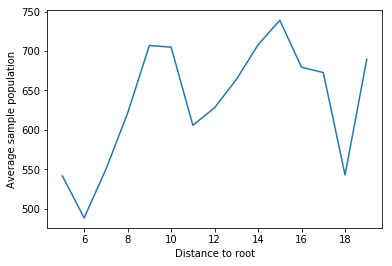

In [50]:
s = pd.Series(x, index=y)
s = s[s.index>4]
s.groupby(s.index).mean().plot()
plt.xlabel("Distance to root")
plt.ylabel("Average sample population")

Text(0,0.5,'Sample population')

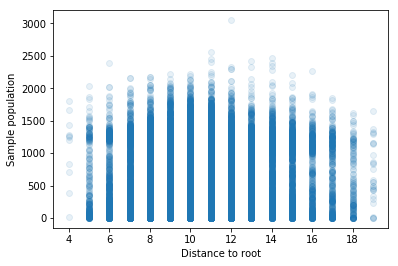

In [12]:
plt.scatter(y,x, alpha=0.1)
plt.xlabel("Distance to root")
plt.ylabel("Sample population")

In [4]:
te_selecta = lambda x:x["type"]in [2,3]
te_dist  = "train"
te_ratio = 1
te_nitems= 100
ntest = 5
res_eszsl, res_adgpm, m = [],[],[]

ranges = [(0,10), (10,50), (50,100), (100, 500), 
          (500,1000), (1000,1500), (1500,2000), 
          (2000, 10000)]#, (5000, 10000)]

for x in ranges:
    dftree, dfsem = get_what(allsyns, imin=x[0], imax=x[1])
    tree = get_tree(dftree)
    trnodes  = set(dftree[dftree["train"]].index.tolist())
    tenodes_ = select_split(tree, te_selecta, trnodes)
    print(x, len(trnodes), len(tenodes_))
    for i in range(ntest):
        tenodes = np.random.choice(list(tenodes_), 100, replace=False)
        eszsl = test_eszsl_sample(trnodes, tenodes, dfsem)
        adgpm = test_adgpm_sample(trnodes, tenodes)
        m.append(np.mean([imcount[x] for x in tenodes]))
        res_eszsl.append(eszsl)
        res_adgpm.append(adgpm)

100%|██████████| 21845/21845 [00:51<00:00, 424.51it/s]


5492 correct lemmas. (35249 lemmas removed). 17039 synsets removed for lack of correct lemmas


82115it [00:04, 18006.34it/s]
100%|██████████| 82115/82115 [00:01<00:00, 43862.25it/s]


82115 84427 [60270, 20634, 212, 999]
2323 2422 [230, 882, 212, 999]


  2%|▏         | 15/999 [00:00<00:06, 148.41it/s]

1718 1813 [72, 435, 212, 999]


100%|██████████| 1718/1718 [00:01<00:00, 1279.18it/s]


(0, 10) 999 202


100it [00:06, 15.95it/s]
100it [00:00, 2300.33it/s]
100it [00:01, 56.47it/s]
100it [00:00, 2053.72it/s]
100it [00:01, 55.13it/s]
100it [00:00, 1832.79it/s]
100it [00:01, 72.13it/s]
100it [00:00, 1661.44it/s]
100it [00:00, 367.03it/s]
100it [00:00, 1867.21it/s]
100%|██████████| 21845/21845 [00:45<00:00, 476.25it/s]


5492 correct lemmas. (35249 lemmas removed). 17039 synsets removed for lack of correct lemmas


82115it [00:01, 41706.18it/s]
100%|██████████| 82115/82115 [00:01<00:00, 46178.10it/s]


82115 84427 [60270, 20600, 246, 999]
2412 2509 [262, 905, 246, 999]


  1%|▏         | 14/999 [00:00<00:07, 136.74it/s]

1770 1862 [77, 448, 246, 999]


100%|██████████| 1770/1770 [00:01<00:00, 1029.84it/s]
1it [00:00,  4.39it/s]

(10, 50) 999 239


100it [00:29,  3.35it/s]
100it [00:00, 1868.79it/s]
100it [00:17,  5.83it/s]
100it [00:00, 1939.82it/s]
100it [00:07, 12.83it/s]
100it [00:00, 1808.15it/s]
100it [00:06, 15.21it/s]
100it [00:00, 1866.54it/s]
100it [00:02, 40.98it/s]
100it [00:00, 1850.79it/s]
100%|██████████| 21845/21845 [00:45<00:00, 479.44it/s]


5492 correct lemmas. (35249 lemmas removed). 17039 synsets removed for lack of correct lemmas


82115it [00:01, 41786.03it/s]
100%|██████████| 82115/82115 [00:01<00:00, 43651.21it/s]


82115 84427 [60270, 20670, 176, 999]
2245 2336 [194, 876, 176, 999]


  2%|▏         | 15/999 [00:00<00:06, 148.86it/s]

1658 1745 [54, 429, 176, 999]


100%|██████████| 1658/1658 [00:01<00:00, 1583.13it/s]
2it [00:00,  6.32it/s]

(50, 100) 999 166


100it [00:25,  3.93it/s]
100it [00:00, 1461.98it/s]
100it [00:07, 13.51it/s]
100it [00:00, 1512.75it/s]
100it [00:04, 21.93it/s]
100it [00:00, 1568.34it/s]
100it [00:01, 53.35it/s]
100it [00:00, 1626.70it/s]
100it [00:00, 116.05it/s]
100it [00:00, 1570.61it/s]
100%|██████████| 21845/21845 [00:45<00:00, 479.04it/s]


5492 correct lemmas. (35249 lemmas removed). 17039 synsets removed for lack of correct lemmas


82115it [00:01, 43507.12it/s]
100%|██████████| 82115/82115 [00:01<00:00, 46082.16it/s]


82115 84427 [60270, 19933, 913, 999]
3479 3618 [416, 1151, 913, 999]


  1%|          | 10/999 [00:00<00:10, 90.91it/s]

2620 2755 [143, 565, 913, 999]


100%|██████████| 2620/2620 [00:09<00:00, 284.11it/s]
1it [00:00,  2.66it/s]

(100, 500) 999 831


100it [00:24,  4.15it/s]
100it [00:00, 1339.00it/s]
100it [00:25,  3.87it/s]
100it [00:00, 1485.99it/s]
100it [00:21,  4.60it/s]
100it [00:00, 1440.45it/s]
100it [00:19,  5.05it/s]
100it [00:00, 1337.63it/s]
100it [00:14,  6.69it/s]
100it [00:00, 1493.37it/s]
100%|██████████| 21845/21845 [00:45<00:00, 476.12it/s]


5492 correct lemmas. (35249 lemmas removed). 17039 synsets removed for lack of correct lemmas


82115it [00:01, 42260.20it/s]
100%|██████████| 82115/82115 [00:01<00:00, 45847.57it/s]


82115 84427 [60270, 20166, 680, 999]
3048 3164 [324, 1045, 680, 999]


  1%|          | 11/999 [00:00<00:09, 109.58it/s]

2302 2414 [97, 526, 680, 999]


100%|██████████| 2302/2302 [00:05<00:00, 423.75it/s]
2it [00:00,  6.29it/s]

(500, 1000) 999 605


100it [00:25,  3.93it/s]
100it [00:00, 1484.81it/s]
100it [00:21,  4.63it/s]
100it [00:00, 1491.31it/s]
100it [00:16,  6.10it/s]
100it [00:00, 1393.54it/s]
100it [00:13,  7.50it/s]
100it [00:00, 1423.22it/s]
100it [00:10,  9.14it/s]
100it [00:00, 1224.47it/s]
100%|██████████| 21845/21845 [00:45<00:00, 482.70it/s]


5492 correct lemmas. (35249 lemmas removed). 17039 synsets removed for lack of correct lemmas


82115it [00:01, 44065.08it/s]
100%|██████████| 82115/82115 [00:01<00:00, 43323.77it/s]


82115 84427 [60270, 18970, 1876, 999]
4260 4432 [427, 958, 1876, 999]


  1%|          | 8/999 [00:00<00:13, 71.67it/s]

3515 3685 [150, 490, 1876, 999]


100%|██████████| 3515/3515 [00:19<00:00, 180.65it/s]
0it [00:00, ?it/s]

(1000, 1500) 999 1396


100it [00:24,  4.07it/s]
100it [00:00, 1434.80it/s]
100it [00:22,  4.44it/s]
100it [00:00, 1239.84it/s]
100it [00:17,  5.63it/s]
100it [00:00, 1459.39it/s]
100it [00:18,  5.41it/s]
100it [00:00, 404.84it/s]
100it [00:17,  5.84it/s]
100it [00:00, 1414.21it/s]
100%|██████████| 21845/21845 [00:46<00:00, 474.59it/s]


5492 correct lemmas. (35249 lemmas removed). 17039 synsets removed for lack of correct lemmas


82115it [00:01, 43206.47it/s]
100%|██████████| 82115/82115 [00:01<00:00, 45142.97it/s]


82115 84427 [60270, 20563, 283, 999]
2231 2322 [148, 801, 283, 999]


  2%|▏         | 17/999 [00:00<00:05, 165.53it/s]

1720 1808 [44, 394, 283, 999]


100%|██████████| 1720/1720 [00:01<00:00, 1390.08it/s]
2it [00:00,  4.45it/s]

(1500, 2000) 999 202


100it [00:25,  3.86it/s]
100it [00:00, 1415.62it/s]
100it [00:13,  7.14it/s]
100it [00:00, 1485.59it/s]
100it [00:04, 21.87it/s]
100it [00:00, 1450.98it/s]
100it [00:03, 29.72it/s]
100it [00:00, 1487.74it/s]
100it [00:01, 54.04it/s]
100it [00:00, 1526.11it/s]
100%|██████████| 21845/21845 [00:45<00:00, 484.42it/s]


5492 correct lemmas. (35249 lemmas removed). 17039 synsets removed for lack of correct lemmas


82115it [00:01, 42305.63it/s]
100%|██████████| 82115/82115 [00:01<00:00, 46191.42it/s]


82115 84427 [60270, 20820, 26, 999]
1893 1972 [105, 763, 26, 999]


  2%|▏         | 19/999 [00:00<00:05, 188.75it/s]

1439 1514 [26, 388, 26, 999]


100%|██████████| 1439/1439 [00:00<00:00, 15641.75it/s]


(2000, 10000) 999 15


ValueError: Cannot take a larger sample than population when 'replace=False'

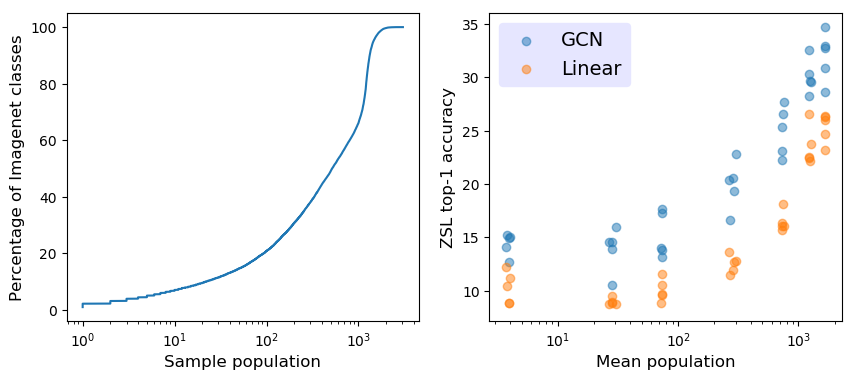

In [10]:
plt.style.use('default')

fig,axes = plt.subplots(1,2, figsize=(10,4))

Y = imcount.sort_values().values
X = np.linspace(1,100,len(Y))
axes[0].plot(Y,X)

y = [x[0] for x in res_adgpm]
axes[1].scatter(m, y, alpha=.5, label="GCN")

y = [x[0] for x in res_eszsl]
axes[1].scatter(m, y, alpha=.5, label="Linear")

axes[1].set_xscale('log')
axes[1].set_xlabel("Mean population", fontsize=12)
axes[1].set_ylabel("ZSL top-1 accuracy", fontsize=12)
legend = axes[1].legend(fontsize=14)
frame = legend.get_frame()
frame.set_alpha(1)
frame.set_color("#e6e6ff")

axes[0].set_xscale('log')
axes[0].set_xlabel("Sample population", fontsize=12)
axes[0].set_ylabel("Percentage of Imagenet classes", fontsize=12)

fig.savefig("./data/plots/sample_population")